In [60]:
import matplotlib.pyplot as plt 
import numpy as np              
from sklearn.cluster import KMeans  
import sklearn.metrics as sklm  
import pandas as pd
import geopandas as gpd
import csv
from sklearn import metrics

In [61]:
data_filename = 'demo1.csv'
data = np.genfromtxt(data_filename,delimiter = ',')

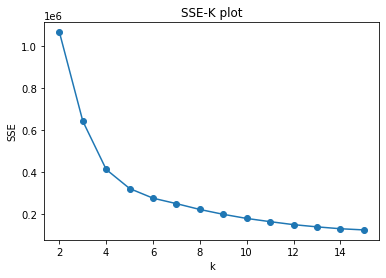

In [62]:
SSE = []
for k in range(2, 16):
    model = KMeans(n_clusters=k).fit(data)
    SSE.append(model.inertia_)
X = range(2, 16)
fig_title = 'SSE-K plot'
plt.title(fig_title)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

In [63]:
num_clusters_new=5
kmeans_output_new = KMeans(n_clusters=num_clusters_new, n_init=1).fit(data)
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans_new = kmeans_output_new.labels_

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters_new = np.hstack((data,np.array([clustering_ids_kmeans_new]).T))

In [64]:
print(clustering_ids_kmeans_new)
type(complete_data_with_clusters_new)
complete_data_with_clusters_new

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 3 0 0 0 0 0 3 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 3 0 0 0 0 0 3 3 0 0 3 0 0 3 3 3 3 3
 3 2 3 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 3 0 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 1 3 3 0 3 3 0 0 0 0 3 3
 3 0 0 0 1 1 3 3 0 3 0 3 3 0 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3
 0 0 0 1 0 3 1 0 0 0 1 1 3 3 3 0 0 0 0 1 3 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 3 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 

array([[ 49.825     ,  34.836472  ,  58.83736995,   0.        ],
       [ 33.75      ,  11.596406  ,  18.377975  ,   1.        ],
       [ 31.9375    ,   9.57883   ,  18.377975  ,   1.        ],
       ...,
       [ 37.838     ,   8.234681  , 210.72464   ,   3.        ],
       [ 37.435     ,   7.472124  , 323.68421   ,   2.        ],
       [ 37.919     ,   8.909818  , 133.790325  ,   3.        ]])

In [65]:
datasave = pd.DataFrame(complete_data_with_clusters_new)
datasave.to_csv('raw.csv')

In [66]:
datafin2 = pd.read_csv('demo_raw_dbscan_full.csv')

In [67]:
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")

In [68]:
plotwithscore = pd.merge(gdf, datafin2 ,left_on='MSOA11CD', right_on='id', how='inner').reset_index()

Text(0.5, 1.0, 'K-Means')

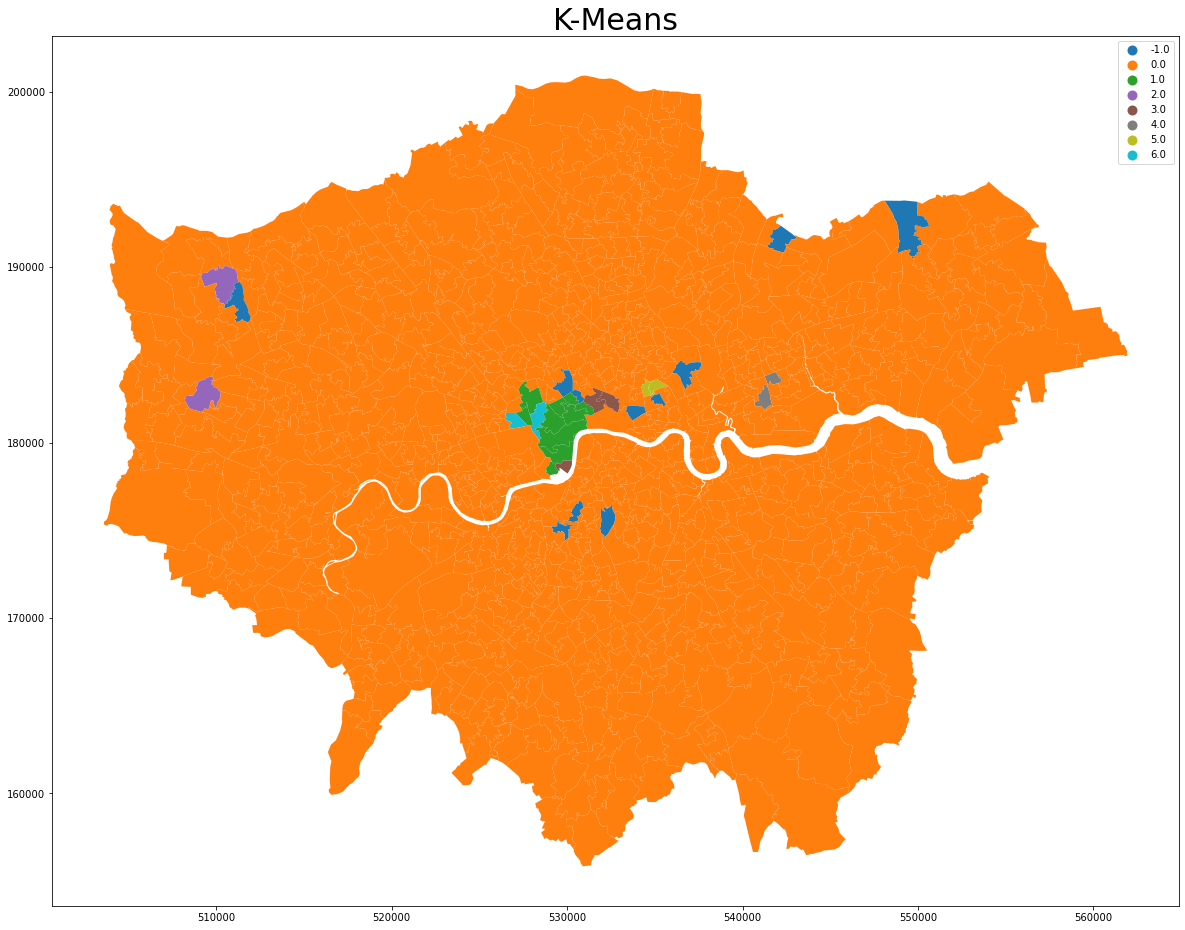

In [69]:
plotwithscore.plot(column='group', categorical=True, legend=True, figsize=(24,16))
plt.title("K-Means",fontsize=30)

In [70]:
dbscan_silhouette_score_new = metrics.silhouette_score(data, clustering_ids_kmeans_new)
dbscan_silhouette_score_new

0.44542005381813277